Task: Measures of central tendency, measures of spread
You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Perform following measures, detect and remove outliers using IQR
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import math

In [6]:
data = pd.read_csv('E:\ML\Task1\house_price.csv')
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


Both 'size' column and 'bhk' column are same. Thats why i dropped one column.

In [13]:
data.drop(columns='size',inplace=True)
data

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


# Mean

In [14]:
Mean=data["price_per_sqft"].mean().round(2)
print("Mean = ",Mean)

Mean =  7920.34


In [15]:
data["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

# Percentile

In [16]:
q1,q2,q3=data.price_per_sqft.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
print(data.price_per_sqft.quantile(np.arange(.9980,.9999,.0001)).round(2))



25 percentile = 4267.0, 50 percentile = 5438.0, 75 percentile = 7317.0
0.9980      35326.75
0.9981      35616.41
0.9982      36463.57
0.9983      37306.27
0.9984      38723.66
0.9985      43467.40
0.9986      45886.95
0.9987      47934.49
0.9988      48728.38
0.9989      50167.90
0.9990      50959.36
0.9991      52212.00
0.9992      54406.28
0.9993      58867.84
0.9994      76561.68
0.9995     116791.57
0.9996     193421.01
0.9997     373878.18
0.9998     642191.27
0.9999    1779435.37
Name: price_per_sqft, dtype: float64


From .9994 onwards the value of 'price_per_sqft' is drastically changing.

# IQR

In [17]:
IQR=q3-q1
print("IQR = ",IQR)

IQR =  3050.0


In [18]:
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))

Lower Whisker = -308.0  Upper Whisker = 11892.0


IQR is mainly used to find out the outliers in the dataset. Data which is less than lower whisker or greater than upper whisker comes under outliers.So here 1265 rows of outliers are there.

In [19]:
data[(data["price_per_sqft"]<LW)|(data["price_per_sqft"]>UW)]

,location,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,3300.0,4.0,600.0,4,18181
9,other,1020.0,6.0,370.0,6,36274
22,Thanisandra,2800.0,5.0,380.0,4,13571
45,HSR Layout,600.0,9.0,200.0,8,33333
48,KR Puram,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...
13142,other,1140.0,1.0,185.0,2,16228
13157,other,1400.0,7.0,218.0,7,15571
13185,Hulimavu,500.0,1.0,220.0,1,44000
13186,other,1200.0,5.0,325.0,4,27083


Below is the dataset without outliers.

In [20]:
data[(data["price_per_sqft"]>LW)& (data["price_per_sqft"]<UW)]

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615
2,Uttarahalli,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245
4,Kothanur,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689
13196,other,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407


# Normal distribution

In [21]:
data["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

Using describe function we can conclude that price_per_sqft is not normally distributed because mean and median is not nearby. In case of a positively skewed frequency distribution, the mean is always greater than median and 
a negatively skewed frequency distribution, the mean is always lesser than median.
Here mean(7920.34) is greater than median(50%-5438.00) .So it is positively skewed.


In [22]:
data["price_per_sqft"].skew()

108.28105529705168

Using skew function also we can find whether it is positively or negatively skewed. Return value of skew is a positive number and greater than 1. That means the data is extremely skewed.

To convert a skewed data distribution to normal distribution we are using "log" function here.

In [29]:
data['log_price_per_sqft']=np.log(data["price_per_sqft"])
print("skew=",data['log_price_per_sqft'].skew())

data['log_price_per_sqft']=np.log(np.log(np.log(data['log_price_per_sqft'])))
print("skew1=",data['log_price_per_sqft'].skew())
print("kurtosis=",kurtosis(data['log_price_per_sqft'],fisher=False))

data["zscore"]=(data["log_price_per_sqft"]-(data["log_price_per_sqft"].mean()))/(data["log_price_per_sqft"].std())  #z=  x-mean/std

df=data[(data["zscore"]>-3)&(data["zscore"]<3)]

print("\n Final skewness =",df['log_price_per_sqft'].skew().round(2))
print("Final kurtosis=",kurtosis(df['log_price_per_sqft'],fisher=False).round(2))


skew= 1.3998626551353
skew1= 0.38445692103279827
kurtosis= 6.956141009106911

 Final skewness = 0.55
Final kurtosis= 3.21


Using describe function we can see the mean and median is almost same. That means now it is normally distributed.

In [30]:
df['log_price_per_sqft'].describe().round(2)

count    13132.00
mean        -0.26
std          0.03
min         -0.36
25%         -0.28
50%         -0.27
75%         -0.25
max         -0.17
Name: log_price_per_sqft, dtype: float64

C:\Users\Mathew\AppData\Local\Temp\ipykernel_1656\3903390594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_price_per_sqft'],color='r')


<Axes: xlabel='log_price_per_sqft', ylabel='Density'>

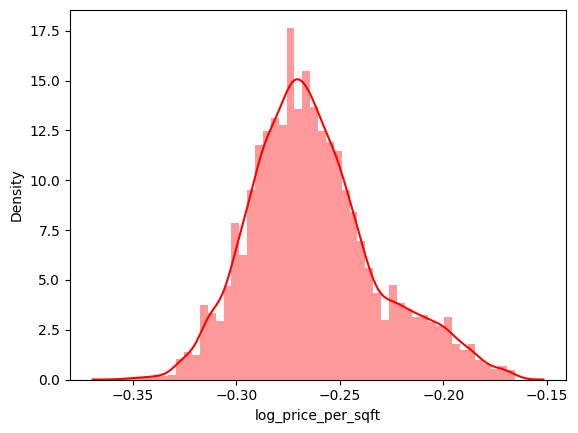

In [31]:
sns.distplot(df['log_price_per_sqft'],color='r')

In [32]:
Mean=df['log_price_per_sqft'].mean()
Mean

-0.262671810629868

In [33]:
Std=df["log_price_per_sqft"].std()
Std

0.030768317199828168

In [34]:
MinusSigma=(Mean-3*Std).round(2)  #-3sigma

In [35]:
PlusSigma=(Mean+3*Std).round(2) #3sigma


As it is normally distributed the 99.7% data is between mean-3*std and mean+3*std. Rest are the outliers

In [36]:
df[(df["log_price_per_sqft"]>MinusSigma)&(df["log_price_per_sqft"]<PlusSigma)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,-0.294613,-0.986924
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,-0.277919,-0.473276
2,Uttarahalli,1440.0,2.0,62.00,3,4305,-0.283066,-0.631636
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,-0.256520,0.185107
4,Kothanur,1200.0,2.0,51.00,2,4250,-0.284027,-0.661221
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,-0.251873,0.328108
13196,other,3600.0,5.0,400.00,4,11111,-0.219695,1.318145
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,-0.268499,-0.183440
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,-0.223645,1.196614


Outliers

In [37]:
df[(df["log_price_per_sqft"]<=MinusSigma)|(df["log_price_per_sqft"]>=PlusSigma)]

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
130,Electronic City,880.0,1.0,16.5,2,1875,-0.352443,-2.766205
978,Rajaji Nagar,315.0,4.0,90.0,4,28571,-0.168272,2.900321
1281,Chamrajpet,4050.0,7.0,1200.0,9,29629,-0.166477,2.955547
1659,Whitefield,3250.0,5.0,900.0,5,27692,-0.169824,2.852557
1770,other,1660.0,10.0,475.0,10,28614,-0.168197,2.902613
2375,Yelahanka New Town,960.0,2.0,18.0,1,1875,-0.352443,-2.766205
2618,Malleshwaram,3000.0,4.0,900.0,7,30000,-0.165865,2.974360
2632,other,2400.0,4.0,700.0,4,29166,-0.167253,2.931672
2830,BTM 2nd Stage,1500.0,2.0,450.0,4,30000,-0.165865,2.974360
3136,other,1200.0,4.0,350.0,4,29166,-0.167253,2.931672


# Z Score

In [38]:
data["zscore"]=(data["log_price_per_sqft"]-Mean)/Std  #z=  x-mean/std
data

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,-0.294613,-1.038131
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,-0.277919,-0.495547
2,Uttarahalli,1440.0,2.0,62.00,3,4305,-0.283066,-0.662828
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,-0.256520,0.199926
4,Kothanur,1200.0,2.0,51.00,2,4250,-0.284027,-0.694080
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,-0.251873,0.350983
13196,other,3600.0,5.0,400.00,4,11111,-0.219695,1.396792
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,-0.268499,-0.189384
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,-0.223645,1.268415


Using z-score we removed the outliers. Any z-score greater than +3 or less than -3 is considered as outlier. Below is the data set without outliers.

In [42]:
df=data[(data.zscore>-3) & (data.zscore<3)]
df

,location,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699,-0.294613,-1.038131
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615,-0.277919,-0.495547
2,Uttarahalli,1440.0,2.0,62.00,3,4305,-0.283066,-0.662828
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245,-0.256520,0.199926
4,Kothanur,1200.0,2.0,51.00,2,4250,-0.284027,-0.694080
...,...,...,...,...,...,...,...,...
13195,Whitefield,3453.0,4.0,231.00,5,6689,-0.251873,0.350983
13196,other,3600.0,5.0,400.00,4,11111,-0.219695,1.396792
13197,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258,-0.268499,-0.189384
13198,Padmanabhanagar,4689.0,4.0,488.00,4,10407,-0.223645,1.268415


# BoxPlot

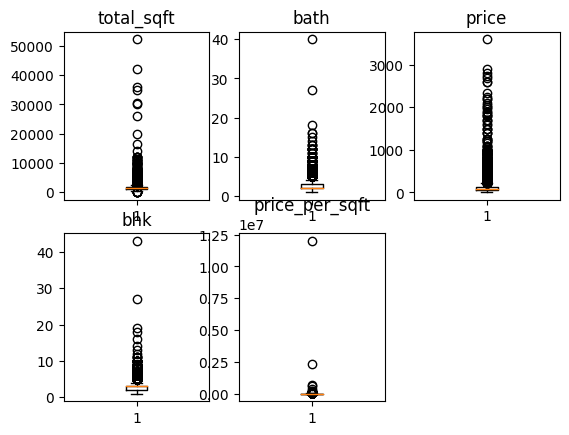

In [41]:

plt.subplot(2, 3, 1)
plt.boxplot(data.total_sqft)
plt.title("total_sqft")

plt.subplot(2, 3, 2)
plt.boxplot(data.bath)
plt.title("bath")

plt.subplot(2, 3, 3)
plt.boxplot(data.price)
plt.title("price")

plt.subplot(2, 3, 4)
plt.boxplot(data.bhk)
plt.title("bhk")

plt.subplot(2, 3, 5)
plt.boxplot(data.price_per_sqft)
plt.title("price_per_sqft")


plt.show()

# Histplot

<Axes: xlabel='price_per_sqft', ylabel='Count'>

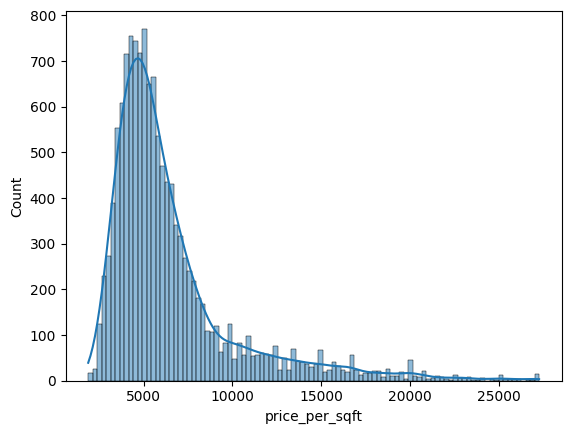

In [48]:
sns.histplot(data=df, x=df.price_per_sqft,kde=True)

<Axes: xlabel='log_price_per_sqft', ylabel='Count'>

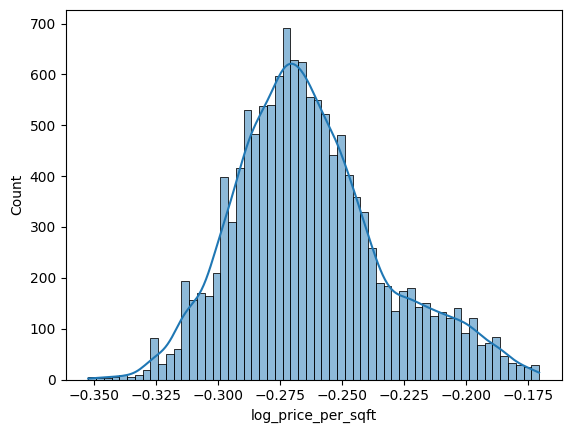

In [49]:
sns.histplot(data=df, x=df.log_price_per_sqft,kde=True)

# HeatMap

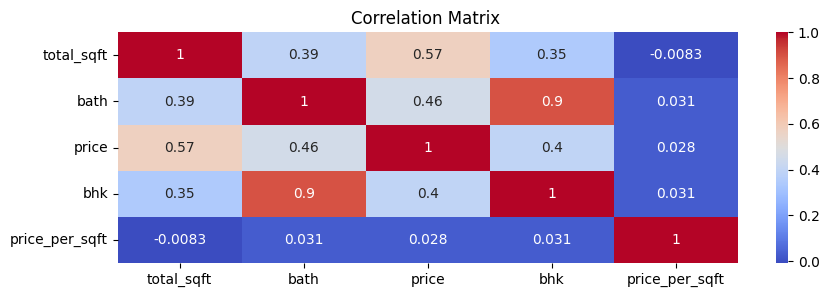

In [50]:
df1=data.drop(['location','log_price_per_sqft','zscore'], axis='columns')
# Compute correlation matrix
corr = df1.corr()
figure = plt.figure(figsize =(10, 3))
# Create heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Add title
plt.title("Correlation Matrix ")

# Show plot
plt.show()

# Pair Plot

C:\Users\Mathew\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


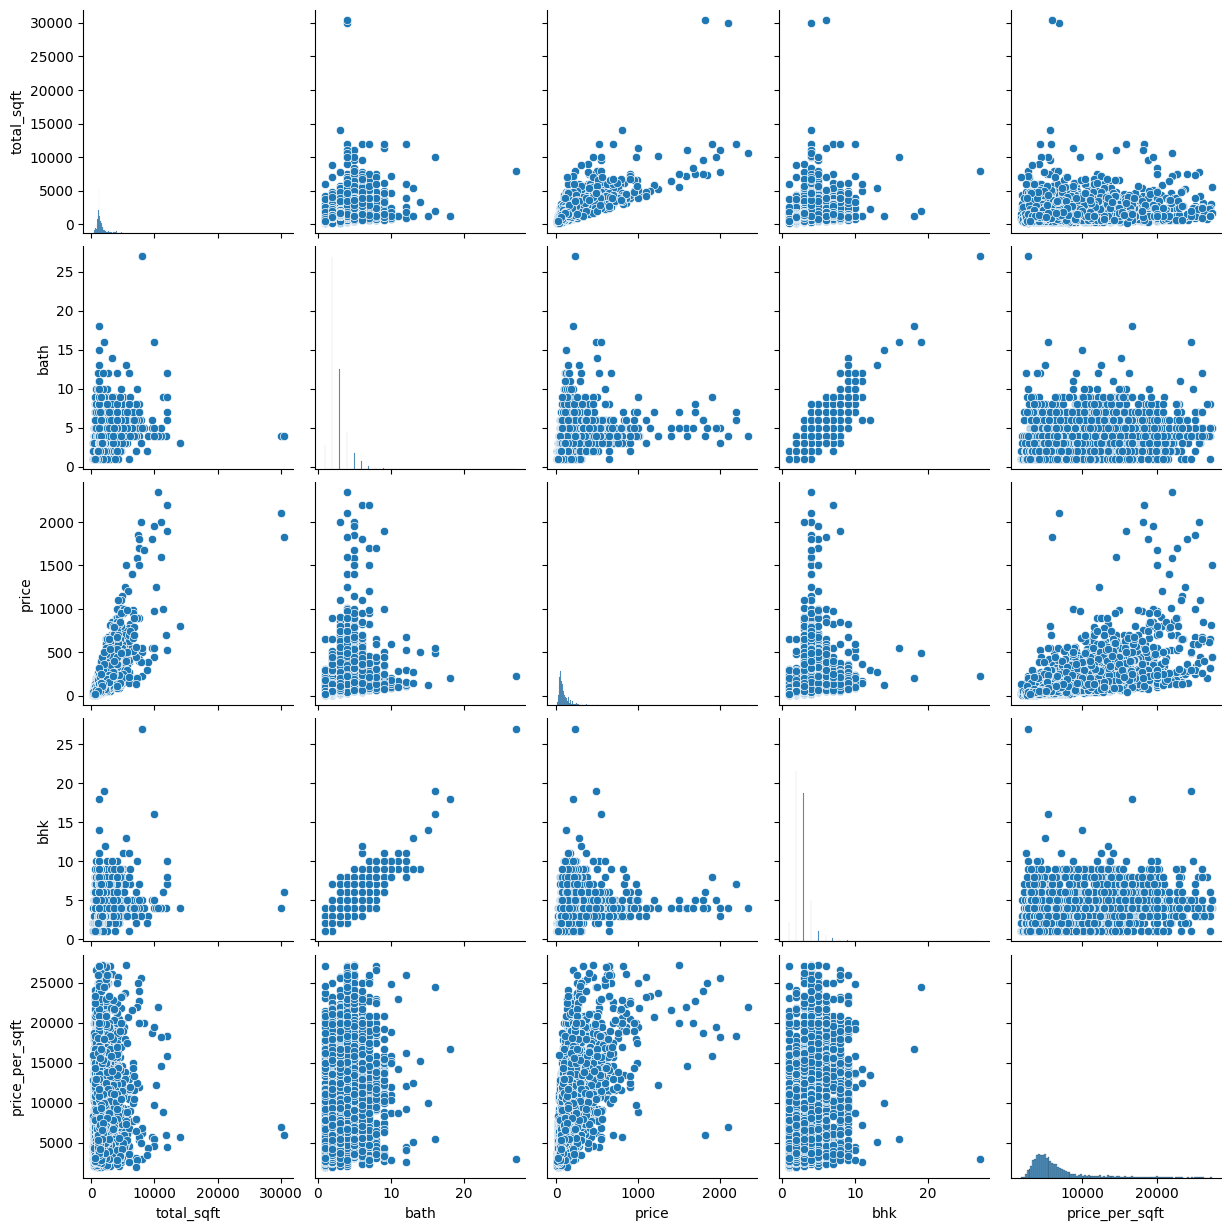

In [52]:
df2=df.drop(['log_price_per_sqft','zscore'], axis='columns')
sns.pairplot(df2, diag_kind='hist')